<a href="https://colab.research.google.com/github/annagirerd/Final-Project/blob/main/ColabScript.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS 4002 Final Project
**Research Question:** Which factors are most predictive of sentence length for federal cocaine trafficking offenders, and how do plea deals impact these predictions?

## Exploratory Data Analysis

In [1]:
import pandas as pd

# Reading in tsv file
df = pd.read_csv('crime_sentencing.tsv', sep='\t')
df.head()

<ipython-input-1-f92a95c52fac>:4: DtypeWarning: Columns (1,2,7,8,13,18,21,228,230,231,232,233,234,235,236,245,247,248,264,265,336,343,381,382,395,396,426,440,441,442,475,476,554,555,557,558,559,560) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('crime_sentencing.tsv', sep='\t')


,USSCIDN,AGE,AGECAT,CIRCDIST,CITIZEN,CITWHERE,DISTRICT,DOBMON,DOBYR,EDUCATN,...,USARMHI,USKIDHI,VULVCTHI,XMAXSOR,XMINSOR,DSIND,DSJANDC,DSPLEA,DSPSR,DSSOR
0,2492676,34,4,60,3,49,67,4,1984,6,...,0,0,0,37,30,1.0,1.0,1.0,1.0,1.0
1,2492679,36,5,89,3,49,30,2,1982,12,...,0,0,0,6,0,1.0,1.0,5.0,1.0,1.0
2,2492680,50,6,91,1,211,31,11,1967,33,...,0,0,0,24,18,1.0,1.0,1.0,1.0,1.0
3,2492681,41,6,91,3,20,31,3,1977,9,...,0,0,0,27,21,1.0,1.0,1.0,1.0,1.0
4,2492684,27,3,91,3,20,31,1,1991,12,...,0,0,0,24,18,1.0,1.0,1.0,1.0,1.0


In [2]:
from sklearn.tree import DecisionTreeClassifier

plea_deal_data = df[df['NEWCNVTN'] == '0']
trial_data = df[df['NEWCNVTN'] == '1']


features = [
    'AGE', 'AGECAT', 'MONSEX', 'MONRACE', 'HISPORIG', 'NEWEDUC', 'NUMDEPEN', 'CITIZEN',
    'CITWHERE', 'DOBYR', 'CIRCDIST', 'DISTRICT', 'MONCIRC', 'ZONE', 'SOURCES', 'QUARTER',
    'CHEMTYP1', 'CHEMDES1', 'COMBDRG2', 'WEAPON', 'TERM', 'SUPVIS', 'FINES', 'RESTITUTION',
    'GUIDEMIN', 'GUIDEMAX', 'PLEA', 'GUIDELINE', 'BASELVL', 'CHAPTER', 'CHIST', 'ADJLVL',
    'CUMOFF', 'ROLE', 'OBSTAG', 'SAFETY', 'DEPART', 'EXTEND', 'DAFROM1', 'DATO1', 'UNIT1',
    'DRGAM1', 'CAFROM1', 'CATO1', 'CUNIT1', 'NEWCIT', 'NEWRACE', 'CHDISP', 'MULTI', 'RECIDIV'
]
target = 'SENTTCAP'  # Replace with your target variable name


# Decision Tree for Plea Deals
X_plea = plea_deal_data[features]
y_plea = plea_deal_data[target]
plea_tree = DecisionTreeClassifier()
plea_tree.fit(X_plea, y_plea)


# Decision Tree for Trials
X_trial = trial_data[features]
y_trial = trial_data[target]
trial_tree = DecisionTreeClassifier()
trial_tree.fit(X_trial, y_trial)


# Visualize or evaluate the trees if needed
from sklearn.tree import export_text
print("Plea Deal Tree:")
print(export_text(plea_tree, feature_names=features))


print("\nTrial Tree:")
print(export_text(trial_tree, feature_names=features))






KeyError: "['TERM', 'SUPVIS', 'FINES', 'RESTITUTION', 'GUIDEMIN', 'GUIDEMAX', 'PLEA', 'GUIDELINE', 'BASELVL', 'CHAPTER', 'CHIST', 'ADJLVL', 'CUMOFF', 'ROLE', 'OBSTAG', 'DEPART', 'EXTEND', 'CHDISP', 'MULTI', 'RECIDIV'] not in index"

Question: Is there significant correlation between taking a plea deal and having a longer sentence length?

# Trees

[Text(0.5, 0.75, 'x[383] <= 2.5\ngini = 0.047\nsamples = 76538\nvalue = [74709, 1829]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 74709\nvalue = [74709, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 1829\nvalue = [0, 1829]'),
 Text(0.625, 0.5, '  False')]

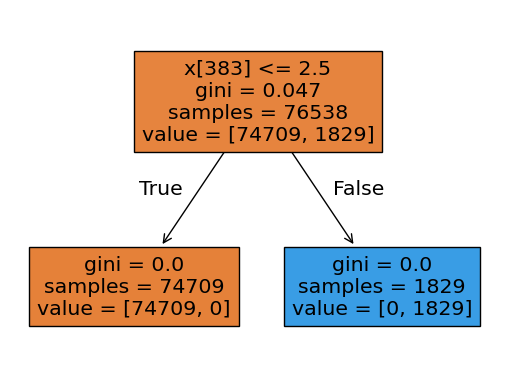

In [ ]:
from sklearn.tree import DecisionTreeClassifier  # Import the tree classifier
from sklearn.tree import plot_tree  # Import the tree classifier
import pandas as pd
import numpy as np

# Ensure that all columns in X and y are numeric
df['NEWCNVTN'] = pd.to_numeric(df['NEWCNVTN'], errors='coerce')
y = df['NEWCNVTN']
X = df.drop(['NEWCNVTN'], axis=1)

# Convert X columns to numeric, coercing errors to NaN, then fill NaN values
X = X.apply(pd.to_numeric, errors='coerce').fillna(0)  # Fill missing values with 0 or another imputation method

# Fill any remaining NaN in y with the mode (most common value)
y = y.fillna(y.mode()[0])

# Fit decision tree:
cart = DecisionTreeClassifier()  # Create a classifier object
cart = cart.fit(X, y)  # Fit the classifier

# Visualize results:
plot_tree(cart, filled=True)
